# Neuronske mreže 

## Motivacija

Danas u računarstvu sve više slušamo o području strojnog učenja.
Ono nam pomaže u raznim područjima razvoja aplikacija te je gotovo nemoguće zamisliti personalizirani
servis koji ne bi ispod sebe imao neke od algoritama strojnog učenja.
Kroz ovu bilježnicu ćemo obraditi jedan od najzanimljivijih modela strojnog učenja za kojeg se tvrdi da 
je korak prema otkrivanju prave umjetne inteligencije - neuralne mreže.

Za kratki uvod ćemo početi s linearnom regresijom i logističkom regresijom na vrlo jednostavnim primjerima te ćemo preći na njihovo moćnije poopćenje s neuralnim mrežama.

In [1]:
import pandas as pd
trening = pd.read_csv('linreg_trening.txt', sep = " ")

In [2]:
trening.columns

Index(['x', 'y'], dtype='object')

Vizualizirajmo si dobivene trening podatke iz tekstualne datoteke

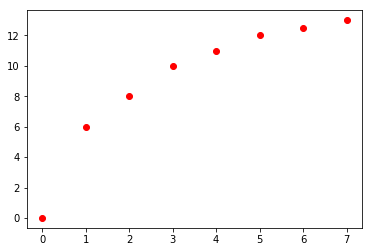

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(trening['x'], trening['y'], 'ro')

Želimo na temelju dobivenih podataka provući neku funkciju koja bi dobro aproksimirala naše trening primjere te nove primjere koje možemo dobiti. Problem rješavamo primjenom linearne regresije.

Općenito, imamo m trening primjera te n značajki (feature) aproksimacijske funkcije kojima su pridruženi odgovarajući realni koeficijenti. Primjetimo da indeksiranje primjera ide u eksponent da ne bi bilo dvosmislenosti između primjera i značajki. To je konvencija koje ćemo se držati u nastavku.

In [4]:
from IPython.display import display, Math, Latex
display(Math(r'(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(n)}, y^{(n)})'))
display(Math(r'h(x) = \Theta_{1}x_{1}+\Theta_{2}x_{2}+...+\Theta_{n}x_{n}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Umijeće je pametno izabrati značajke za regresiju. Mi ćemo uzeti 3 izbora značajki te ćemo usporediti rezulate koje smo dobili da vidimo kako se ponaša algoritam linearne regresije.

In [5]:
import sympy as sp
sp.init_printing()
x = sp.Symbol('x')
theta0, theta1, theta2, theta3 = sp.symbols('theta0, theta1, theta2, theta3')

In [6]:
h1 = theta0 + theta1*x
h2 = theta0 + theta1*x + theta2*x*x
h3 = theta0 + theta1*x + theta2*x*x + theta3*x*x*x
h1, h2, h3

Ovaj oblik nam zasad nije dobar jer funkcije nisu afine. To se lako postigne trivijalnim supstitucijama.

In [7]:
x1, x2, x3, x4 = sp.symbols('x1, x2, x3, x4')
h1_subs = h1.subs({x: x1})
h2_subs = h2.subs({x: x1, x*x: x2})
h3_subs = h3.subs({x: x1, x*x: x2, x*x*x: x3})
h1_subs, h2_subs, h3_subs

Ideja je definirati neku funkciju cijene/greške te ju minimizirati po značajkama aproksimacijske funkcije. Za parametre u kojima se postiže minimum tvrdimo da funkcija h najbolje aproksimira dane primjere i eventualne nove.

In [8]:
display(Math(r'C(\Theta_{1}, \Theta_{2}, ..., \Theta_{n}) = \frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^{2}'))
display(Math(r'\frac{\partial}{\partial \theta_{j}}C(\Theta_{1}, \Theta_{2}, ..., \Theta_{n}) = \frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})x_{j}^{(i)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Općenito je jako "skupo" izjednačavati parcijalne derivacije s nulom te rješavati sustave jednadžbi, stoga moramo pribjeći određenim optimizacijskim metodama

### Metoda gradijentog spusta

Ideja je sljedeća. Znamo da realna funkcija više varijabli najbrže raste u smjeru gradijenta. Dakle onda najbrže pada u smjeru suprotnom od gradijenta. Počet ćemo od neke proizvoljne točke na funkciji te ćemo se pomaknuti za određenu "porciju" u smjeru suprotno od gradijenta. Potom ćemo ponovno izračunati gradijent u novodobivenoj točki te ćemo se opet spustiti za određenu "porciju". Na kraju se nadamo da ćemo doći do globalnog minimuma funkcije.

In [9]:
display(Math(r'\Theta_{j} = \Theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}}C(\Theta_{1}, \Theta_{2}, ..., \Theta_{n}) = \Theta_{j} - \alpha  \frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})x_{j}^{(i)}, \eta>0'))

<IPython.core.display.Math object>

In [10]:
import numpy as np
# X je matrica reda m X n (svaki redak predstavlja jedan trening primjer)
# y je matrica reda m X 1 (svaki redak predstavlja traženi rezultat za svaki trening primjer)
# theta je matrica koeficijenata reda n X 1
def cost(X, y, theta):
    m = y.size
    return 1 / (2*m) * np.sum(np.square((np.dot(X, theta) - y)))
def cost_grad(X, y, theta):
    m = y.size
    return 1 / m * np.dot(np.dot(X, theta) - y, X).T

In [11]:
# vektorizirani trening primjeri za sve 3 aproksimacijske funkcije
X1 = np.array([np.ones(trening['x'].size), trening['x']]).T
X2 = np.array([np.ones(trening['x'].size), trening['x'], trening['x'] ** 2]).T
X3 = np.array([np.ones(trening['x'].size), trening['x'], trening['x'] ** 2, trening['x'] ** 3]).T
y = np.array(trening['y'])
X1, X2, X3, y

(array([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]]), array([[ 1.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  2.,  4.],
        [ 1.,  3.,  9.],
        [ 1.,  4., 16.],
        [ 1.,  5., 25.],
        [ 1.,  6., 36.],
        [ 1.,  7., 49.]]), array([[  1.,   0.,   0.,   0.],
        [  1.,   1.,   1.,   1.],
        [  1.,   2.,   4.,   8.],
        [  1.,   3.,   9.,  27.],
        [  1.,   4.,  16.,  64.],
        [  1.,   5.,  25., 125.],
        [  1.,   6.,  36., 216.],
        [  1.,   7.,  49., 343.]]), array([ 0. ,  6. ,  8. , 10. , 11. , 12. , 12.5, 13. ]))

In [12]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = y.size
    for i in range(epochs):
        theta = theta - alpha * cost_grad(X, y, theta)
        if (i < 10 or i > epochs-10):
            print('cost: {0:2f}'.format(cost(X, y, theta)))
        elif (i == 10):
            print('...')
    return theta
def lin_reg(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n).T
    theta = gradient_descent(X, y, theta, alpha, 1000)
    return theta
def evaluate(theta, x):
    arr = np.ones(x.size)
    for i in range(theta.size - 1):
        arr = np.c_[arr, x**(i+1)]
    return np.dot(arr, theta)
# alfu smo izabrali rucno da bude idealna, inace bi trebalo i to automatizirati.
# više priče o tome poslije
theta1 = lin_reg(X1, y, 0.1, 1000)

cost: 34.104395
cost: 23.776920
cost: 16.794367
cost: 12.068426
cost: 8.865165
cost: 6.689617
cost: 5.207963
cost: 4.195050
cost: 3.499003
cost: 3.017367
...
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531
cost: 1.394531


In [13]:
theta1

array([3.375, 1.625])

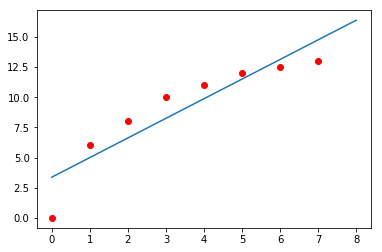

In [14]:
x = np.linspace(0, 8)
plt.plot(x, evaluate(theta1, x))
plt.plot(trening['x'], trening['y'], 'ro')

Zasad smo vidjeli kako izgleda linearna regresija na prvom modelu. Sada ćemo to napraviti i na ostala dva modela

In [15]:
theta2 = lin_reg(X2, y, 0.0033, 1000)
theta2

cost: 48.141670
cost: 46.928112
cost: 45.748908
cost: 44.603049
cost: 43.489553
cost: 42.407470
cost: 41.355876
cost: 40.333876
cost: 39.340601
cost: 38.375208
...
cost: 0.286767
cost: 0.286724
cost: 0.286680
cost: 0.286636
cost: 0.286593
cost: 0.286550
cost: 0.286506
cost: 0.286463
cost: 0.286420


array([ 1.67424661,  3.51891515, -0.27846556])

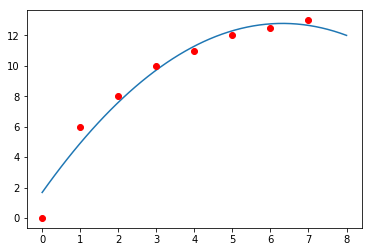

In [16]:
x = np.linspace(0, 8)
plt.plot(x, evaluate(theta2, x))
plt.plot(trening['x'], trening['y'], 'ro')

In [17]:
theta3 = lin_reg(X3, y, 0.00008, 1000)
theta3

cost: 42.975977
cost: 37.829623
cost: 33.699181
cost: 30.382494
cost: 27.717639
cost: 25.574917
cost: 23.850439
cost: 22.460993
cost: 21.339927
cost: 20.433853
...
cost: 3.340550
cost: 3.337964
cost: 3.335385
cost: 3.332813
cost: 3.330248
cost: 3.327691
cost: 3.325140
cost: 3.322596
cost: 3.320059


array([ 0.19597917,  0.42956271,  0.85909158, -0.09400206])

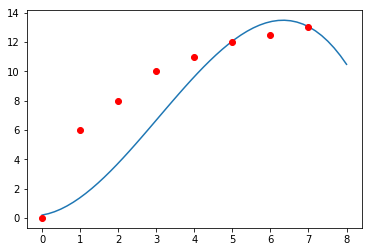

In [18]:
x = np.linspace(0, 8)
plt.plot(x, evaluate(theta3, x))
plt.plot(trening['x'], trening['y'], 'ro')

Vidimo da je najbolji bio kvadratni model. Naravno na trening podacima bi najbolje bilo da napravimo interpolaciju s polinomom stupnja m-1 jer bi tada greška iznosila nula. Međutim, to nije dobro budući da će takav model teško generalizirati i predviđati rezultate za neke druge vrijednosti x. U jednu ruku možemo reći da je takav model "učio napamet" na trening primjerima. Još kažemo da se takav model pretrenirao.
S druge strane, za prvi model ćemo reći da se podtrenirao ili da ima visoku printranost(bias) prema podacima.

## Logistička regresija

Model logičke regresije se uglavnom primjenjuje kod problema klasifikacije. Sada imamo trening skup čiji su elementi kao inače uređeni parovi inputa X i outputa y. Međutim sada je skup svih outputa diskretan. Mi ćemo se baviti slučajem kad je konačan.

Imamo 2 trening skupa koja želimo odvojiti određenom krivuljom h koju ćemo zvati "granica odluke".
Pogledajmo njihove vizualizacije

In [19]:
trening1 = pd.read_csv('logreg_trening1.txt', sep = ",", header = None)
trening2 = pd.read_csv('logreg_trening2.txt', sep = ",", header = None)

In [20]:
trening1

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


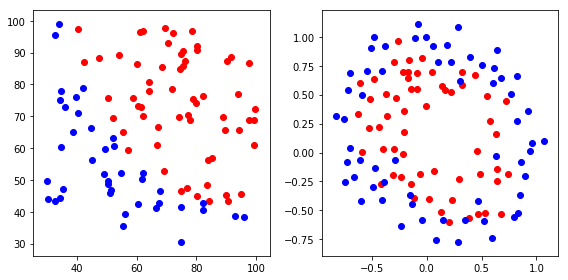

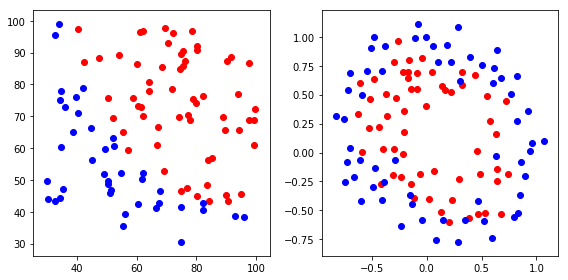

In [21]:
from matplotlib import gridspec
%matplotlib agg

def plot_set (ax, trening):
    for i in range(trening.shape[0]):
        if (trening[2][i] == 0):
            ax.scatter(trening[0][i], trening[1][i], c = 'blue')
        else:
            ax.scatter(trening[0][i], trening[1][i], c = 'red')

fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
plot_set(ax0, trening1)
ax1 = plt.subplot(gs[1])
plot_set(ax1, trening2)

plt.tight_layout()
fig

Imamo trening skup sljedećeg oblika

In [22]:
display(Math(r'(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)}), y^{i}\in\{0, 1\}'))

<IPython.core.display.Math object>

Aproksimacijsku funkciju ne možemo više imati u standardnom obliku kao u linearnoj regresiji jer je ta funckija polinomijalna čime je neograničena, stoga neće dobro aproksimirati skup.

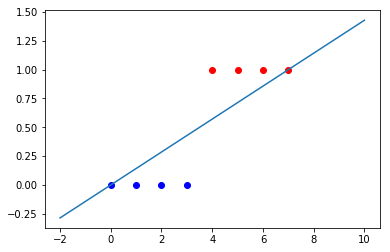

In [23]:
plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'ro', c = 'blue')
plt.plot([4, 5, 6, 7], [1, 1, 1, 1], 'ro', c = 'red')
x = np.linspace(-2, 10)
plt.plot(x, x / 7)

Želimo našu staru aproksimacijsku funkciju nekako "zgnječiti" da joj vrijednosti uvijek budu između 0 i 1.
Rješenje je komponiranje sa logističkom/sigmoidnom funkcijom

In [24]:
display(Math(r'h(x)=g(\theta^{\tau}X),\: g(z)=\frac{1}{1+e^{-z}}'))

<IPython.core.display.Math object>

In [51]:
from IPython.html.widgets import *
%matplotlib inline

def pltsigmoid(a, b):
    plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'ro', c = 'blue')
    plt.plot([4, 5, 6, 7], [1, 1, 1, 1], 'ro', c = 'red')
    x = np.linspace(-2, 10)
    plt.plot(x, 1/(1 + np.e**-(a*(x-b))))
    plt.show()

interact(pltsigmoid, a=(0.5, 10, 0.1), b=(1, 10, 0.2))

interactive(children=(FloatSlider(value=5.2, description='a', max=10.0, min=0.5), FloatSlider(value=5.0, description='b', max=10.0, min=1.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.pltsigmoid>

Intuitivno, možemo aproksimacijsku funkciju h shvatiti kao vjerojatnost da ćemo upasti u klasu 1 uz uvjet na X i theta.
Rezultat ćemo klasificirati kao 0 ako je vrijednost funkcije manja od 0.5, te 1 ako je vrijednost veća ili jednaka 0.5 .
Zapravo imamo sljedeće

In [26]:
display(Math(r'h(x)<0.5 \Rightarrow \theta^{\tau}X<0 \Rightarrow y=0'))
display(Math(r'h(x)\geqslant0.5 \Rightarrow \theta^{\tau}X\geqslant0 \Rightarrow y=1'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Gradijentni spust

Definiramo funkciju cijene malo drugačije i lako odredimo njenu derivaciju

In [27]:
display(Math(r'C(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h(x^{(i)})) + (1-y^{(i)})log(1-h(x^{(i)}))]'))
display(Math(r'\frac{\partial}{\partial\theta_{j}}C(\theta)=\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})x_{j}^{(i)}'))
display(Math(r'\frac{d}{dx}g(x)=g(x)(1-g(x))'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

ovo je formula za gradijentni spust

In [28]:
display(Math(r'\theta_{j}=\theta_{j} - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})x_{j}^{(i)}'))

<IPython.core.display.Math object>

In [29]:
def sigmoid(z):
    return 1 / (1 + np.e**-z)
def cost_logistic(X, y, theta):
    m = y.size
    return -1 / m * (np.dot(y, np.log(sigmoid(np.dot(X, theta)))) + np.dot(np.ones(m) - y, np.log(np.ones(m) - sigmoid(np.dot(X, theta)))))
def cost_logistic_grad(X, y, theta):
    m = y.size
    return 1 / m * np.dot(sigmoid(np.dot(X, theta)) - y, X).T

In [30]:
# vektorizirani trening primjeri
X1 = np.array([np.ones(trening1[0].size), trening1[0], trening1[1]]).T
X2 = np.array([np.ones(trening2[0].size), trening2[0], trening2[1], trening2[0]**2, trening2[1]**2]).T
y1 = np.array(trening1[2]).T
y2 = np.array(trening2[2]).T

In [31]:
def gradient_descent_logistic(X, y, theta, alpha, epochs):
    m = y.size
    for i in range(epochs):
        theta = theta - alpha * cost_logistic_grad(X, y, theta)
        if (i < 10 or i > epochs-10):
            print('cost: {0:2f}'.format(cost_logistic(X, y, theta)))
        elif (i == 10):
            print('...')
    return theta
def log_reg(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n).T
    print(cost_logistic(X, y, theta))
    print(cost_logistic_grad(X, y, theta))
    theta = gradient_descent_logistic(X, y, theta, alpha, epochs)
    return theta

In [32]:
theta1 = log_reg(X1, y1, 0.0010, 1000000)
theta1

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]
cost: 0.698291
cost: 0.659712
cost: 0.661627
cost: 0.648862
cost: 0.649696
cost: 0.643110
cost: 0.643465
cost: 0.639525
cost: 0.639643
cost: 0.637096
...
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654
cost: 0.224654


array([-15.39517866,   0.12825989,   0.12247929])

In [33]:
theta2 = log_reg(X2, y2, 10, 100000)
theta2

0.6931471805599453
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 3.76648474e-02]
cost: 0.667406
cost: 0.663232
cost: 0.711203
cost: 0.859757
cost: 1.125279
cost: 1.071755
cost: 1.196887
cost: 0.975798
cost: 1.098115
cost: 0.924208
...
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957
cost: 0.434957


array([ 3.81164607,  1.35847914,  2.29942288, -8.45116442, -7.77858164])

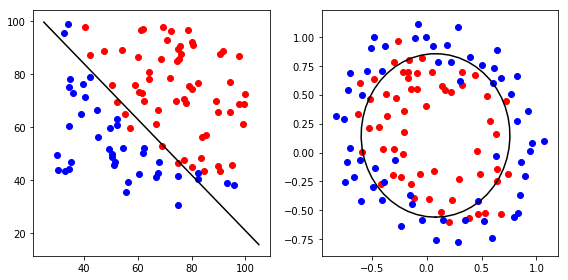

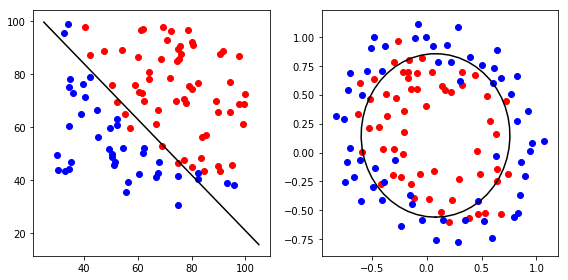

In [34]:
# vizualizacija točaka
fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
plot_set(ax0, trening1)
ax1 = plt.subplot(gs[1])
plot_set(ax1, trening2)

# vizualizacija granice odluke
x = np.linspace(25, 105)
ax0.plot(x, -theta1[0] / theta1[2] -theta1[1] / theta1[2] * x, c = 'black')
t = np.linspace(0, 2 * np.pi)
a = theta2[1]**2 / (4 * np.abs(theta2[3])) + theta2[2]**2 / (4 * np.abs(theta2[4])**2) + theta2[0]
ax1.plot((theta2[1] / (2*np.sqrt(np.abs(theta2[3]))) - np.sqrt(a)*np.sin(t)) / np.sqrt(np.abs(theta2[3])),
        (theta2[2] / (2*np.sqrt(np.abs(theta2[4]))) - np.sqrt(a)*np.cos(t)) / np.sqrt(np.abs(theta2[4])), c = 'black')

plt.tight_layout()
fig

Vidimo da je logistička regresija moćan alat za klasifikaciju primjera.
Napomenimo da se algoritam ne mijenja previše ako imamo više od 2 klase. Tada radimo usporedbe svake klase s ostalim klasama čime dobijemo gore spomenutu "vjerojatnost" da se primjer nalazi u toj klasi. Na kraju proglasimo da je objekt u klasi koja ima najveću vrijednost "vjerojatnosti".

## Motivacija za neuronske mreže

Dosad smo vidjeli modele linearne regresije i logističke regresije te smo zaključili da su to jako moćni alati za učenje s nadzorom. Međutim preciznost modela jako ovisi o izboru njegovih značajki(features). Model neuronskih mreža je ključ za rješenje tog modela, posebno model koji je vezan uz duboko učenje.

Napravimo vizualizaciju logističke regresije

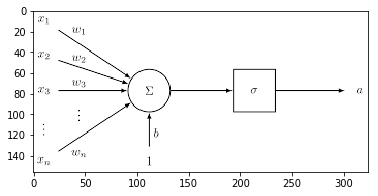

In [58]:
neuron = plt.imread('neuron.png')
plt.imshow(neuron)

Elementi označeni s 'x' su ulazni podaci, koeficijenti 'omega' su isti oni kao kod logističke regresije, samo što smo nulti koeficijent označili s b. Vidimo da se oni skalarno pomnože te na njih djeluje sigmoidna funkcija.
Ovakav mali sustav ćemo zvati neuron. Koeficijente ćemo zvati težinama(weights) neurona, dok nulti koeficijent zovemo pristranost(bias) neurona. Taj bias možemo shvatiti kao neki prag za donošenje pozitivne(1) ili negativne(0) odluke u klasifikaciji.

Ideja je izgraditi model koji će se sastojati od puno takvih neurona koji će biti povezani slojevima. To će nam omogućiti da model postane robusniji te da u nekom smislu može stvarati sam svoje značajke. Zapravo ćemo dobiti da model sloj po sloj gradi više razine apstrakcije na temelju kojih klasificira.

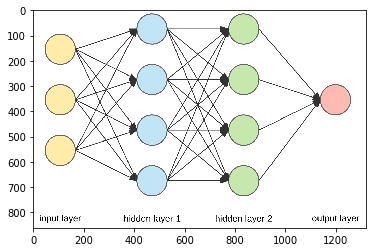

In [60]:
mreza = plt.imread('mreza.png')
plt.imshow(mreza)

Sada ćemo primjeniti neuralnu mrežu na problem prepoznavanja rukom pisanih znamenki. Trening skup se sastoji od 50000 primjera znamenki, dok se skup na kojem ćemo testirati natrenirani model sastoji od 10000 znamenki (http://yann.lecun.com/exdb/mnist/).
Naša mreža će imati 3 sloja: ulazni od 784 neurona - svaki neuron predstavlja piksel 28 x 28 slike znamenke, skriveni sloj od 30 neurona i izlazni sloj od 10 neurona budući da imamo 10 klasa koje predstavljaju znamenke.
Bitna napomena: Oko 80% koda nije napisano s moje strane budući da je posao implementacije gradijentnog spusta za neuralne mreže jako netrivijalan, zahtjeva puno posla, a gotova rješenja već postoje - "we don't want to reinvent the wheel"

In [64]:
# ovo su skripte u kojima se nalazi implementacija mreže i dohvaćanja podataka
# napominjem opet, samo 20% koda je napisano s moje strane
import mnist_loader
import network

In [65]:
trening, validacija, test = mnist_loader.load_data_wrapper()
net = network.Network([784, 30, 10])
net.SGD(trening, 30, 10, 3.0, test_data = test)

Epoch 0: 8149 / 10000
Epoch 1: 9227 / 10000
Epoch 2: 9275 / 10000
Epoch 3: 9316 / 10000
Epoch 4: 9374 / 10000
Epoch 5: 9388 / 10000
Epoch 6: 9328 / 10000
Epoch 7: 9432 / 10000
Epoch 8: 9376 / 10000
Epoch 9: 9441 / 10000
Epoch 10: 9408 / 10000
Epoch 11: 9402 / 10000
Epoch 12: 9432 / 10000
Epoch 13: 9429 / 10000
Epoch 14: 9485 / 10000
Epoch 15: 9444 / 10000
Epoch 16: 9445 / 10000
Epoch 17: 9473 / 10000
Epoch 18: 9444 / 10000
Epoch 19: 9457 / 10000
Epoch 20: 9484 / 10000
Epoch 21: 9438 / 10000
Epoch 22: 9464 / 10000
Epoch 23: 9475 / 10000
Epoch 24: 9486 / 10000
Epoch 25: 9485 / 10000
Epoch 26: 9463 / 10000
Epoch 27: 9481 / 10000
Epoch 28: 9467 / 10000
Epoch 29: 9481 / 10000


Vidimo da smo postigli iznimno visoku preciznost(94.81%) već na najjednostavnijem modelu neuralne mreže. Daljnjim razviljanjem se može doći i blizu rekordne preciznsoti od samo 37 grešaka od 10000 primjera. Više o tome na linku http://neuralnetworksanddeeplearning.com/chap1.html .
Prije sam spomenuo pojam dubokog učenja. To je zapravo model neuralnih mreža koje imaju više od jednog skrivenog sloja. Pokazano je u praksi da se najveće preciznosti dobivaju tim modelom. Upravo ta moć modela da odvoji bitne značajke i gradi više slojeve apstrakcije je razlog zašto mnogi smatraju da su duboke neuralne mreže put prema pravoj umjetnoj inteligenciji.